From: https://towardsdatascience.com/fundamental-statistics-7770376593b

and from: https://machinelearningmastery.com/bayes-theorem-for-machine-learning/

# Fundamental Statistics

Time series data is everywhere around us, ranging from the stock market price to the daily temperature of your city. As its name suggests, the x axis of time series data is time. We are always standing at the current time point. Towards the left-hand side of the x axis, we are looking into the past. If we are lucky, at a simple glimpse, we may be able to find some periodic patterns in the past. Or, if we put in more effort and pull some other variables, we may be able to get some ‘correlations’ to explain our past data. But, can we evaluate how well these other variables models the data? Will these ‘correlations’ hold in the future? Can we count on these past ‘correlations’ and make predictions?

## 1. Population, Sample, and Estimators

Population has an underlying distribution process, which we usually are not able to know exactly. What we can do is to sample from the population and use the samples to estimate the population. But how to choose the proper estimators? There are three properties to define a good estimator: unbiased, consistent, and efficient.
The estimator is unbiased, when the expected value of the sample parameter is equal to the population parameter:

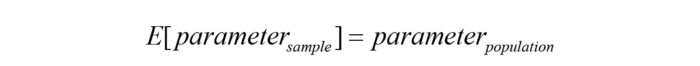

If the variance of the sample parameter decreases with the increasing sample size, the estimator is consistent.

With the same sample size, the estimator with lower variance is more efficient.

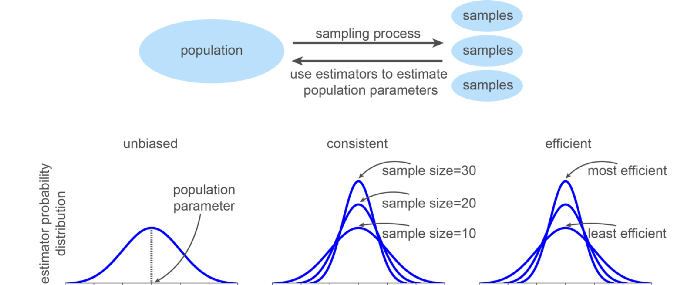

## 2. Probability Density Distribution (PDF)

The probability density distribution (PDF) is used to specify the probability of the random variable falling within a particular range of values. The probability density at a certain x is denoted as f(x). By applying integral function to f(x) over a range of (x1,x2), the probability of x falling in (x1,x2) can be calculated.

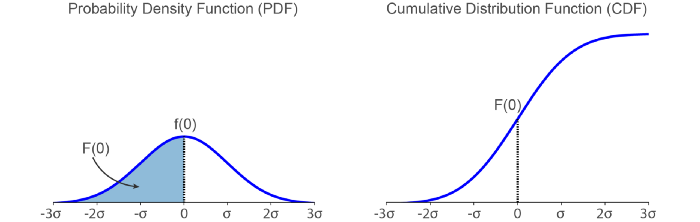


## 3. Central Limit Theorem and Law of Large Numbers

Central Limit Theorem states that when the sample size is large, the sample mean of the independent random variable follows normal distribution. Typically, when sample size is larger than 30, the requirement of large sample size is considered fulfilled. The independent random variables can follow any distribution, while the sample mean of these independent random variables follows normal distribution.

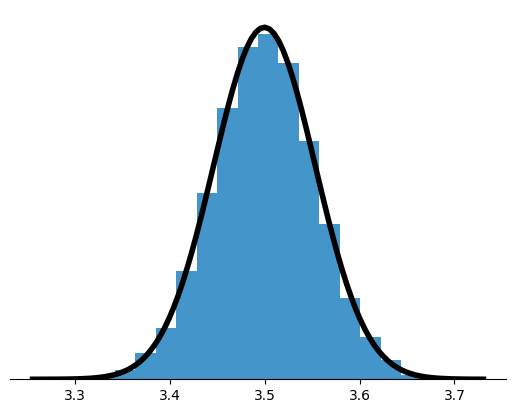

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

meanList = []

num_trials = 10000
num_observations = 1000

for i in range(num_trials):
    # sample from uniform distribution
    numList = np.random.randint(1,7,num_observations)
    # sample from normal distribution
    #numList = np.random.normal(loc=0,scale=1,size=num_observations)
    # sample from poisson distribution
    #numList = np.random.poisson(lam=1,size=num_observations)
    meanList.append(np.mean(numList))

mu, std = norm.fit(meanList)
fig, ax = plt.subplots()
ax.hist(meanList, bins=20, density=True, alpha=1, color='#4495c9')

xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
plt.show()

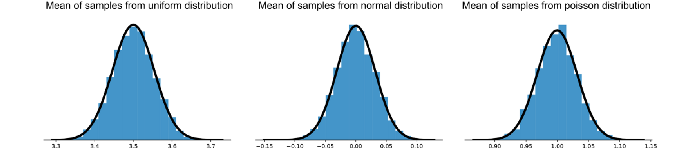

Law of large numbers states that given a large number of trials, the average of the estimator gets closer to the theoretical value. For the above experiment, if we only repeat the trials for 10 times, the distribution will be very different from the plots. If you are interested, you can quickly test out the results to visualize how law of large numbers makes a difference.

## 4. Hypothesis Testing

Given that only sample parameters can be calculated, we need to make inference on the population parameters using hypothesis testing. In hypothesis testing, a set of complementary hypotheses is proposed, which consists of a null hypothesis and an alternative hypothesis. When conducting the hypothesis testing, we choose to believe that the null hypothesis holds true. If the observed value is likely to occur under the condition that the null hypothesis is true, then we do not reject the null hypothesis. However, if the observed value is unlikely to occur, then we reject the null hypothesis and accept the alternative hypothesis.

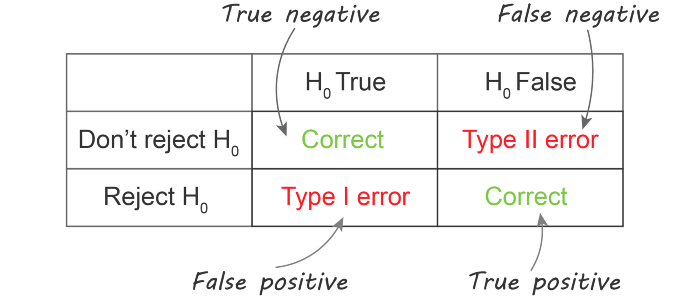

## 5. Significance Level and P Value

Before conducting hypothesis testing, we need to define a significance level first. Significance level determines the level that we want to believe in the null hypothesis. If we set the significance level as 0.05, then as long as the probability of the observation is higher than 5%, we do not reject the null hypothesis. However, if the probability of the observation falls below 5%, we reject the null hypothesis and accept the alternative hypothesis. There is a tradeoff between the Type I and Type II error. Basically, a higher significance level makes it easier to reject the null hypothesis. Although in this way, a higher significance level reduces the Type II error, it also results in a higher Type I error at the same time. The only way to reduce both Type I and Type II error is by increasing the sample size.

The probability of the observed value is called p value. A low p value means that the observation is unlikely to occur under the condition that the null hypothesis holds true. When the p value is lower than significance level, then we reject the null hypothesis. However, one thing to note is that p value should be interpreted as binary: it is only larger or smaller than the significance level.

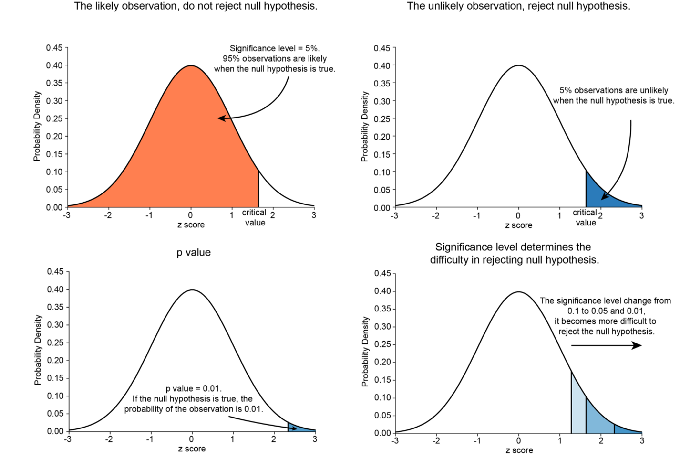

## 6. Bayes Theorem and Diagnostic Tests

**Scenario**: Consider a human population that may or may not have cancer (Cancer is True or False) and a medical test that returns positive or negative for detecting cancer (Test is Positive or Negative), e.g. like a mammogram for detecting breast cancer.

**Problem**: If a randomly selected patient has the test and it comes back positive, what is the probability that the patient has cancer?

Medical diagnostic tests are not perfect; they have error.

Sometimes a patient will have cancer, but the test will not detect it. This capability of the test to detect cancer is referred to as the **sensitivity**, or the true positive rate.

In this case, we will contrive a sensitivity value for the test. The test is good, but not great, with a true positive rate or sensitivity of 85%. That is, of all the people who have cancer and are tested, 85% of them will get a positive result from the test.

- P(Test=Positive | Cancer=True) = 0.85

Given this information, our intuition would suggest that there is an 85% probability that the patient has cancer.

**Our intuitions of probability are wrong.**

This type of error in interpreting probabilities is so common that it has its own name; it is referred to as the *base rate fallacy*.

It has this name because the error in estimating the probability of an event is caused by ignoring the base rate. That is, it ignores the probability of a randomly selected person having cancer, regardless of the results of a diagnostic test.

In this case, we can assume the probability of breast cancer is low, and use a contrived base rate value of one person in 5,000, or (0.0002) 0.02%.

- P(Cancer=True) = 0.02%.

We can correctly calculate the probability of a patient having cancer given a positive test result using Bayes Theorem.

Let’s map our scenario onto the equation:

- P(A|B) = P(B|A) * P(A) / P(B)
- P(Cancer=True | Test=Positive) = P(Test=Positive|Cancer=True) * P(Cancer=True) / P(Test=Positive)

We know the probability of the test being positive given that the patient has cancer is 85%, and we know the base rate or the prior probability of a given patient having cancer is 0.02%; we can plug these values in:

- P(Cancer=True | Test=Positive) = 0.85 * 0.0002 / P(Test=Positive)

We don’t know P(Test=Positive), it’s not given directly.

Instead, we can estimate it using:

- P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)
- P(Test=Positive) = P(Test=Positive|Cancer=True) * P(Cancer=True) + P(Test=Positive|Cancer=False) * P(Cancer=False)

Firstly, we can calculate P(Cancer=False) as the complement of P(Cancer=True), which we already know

- P(Cancer=False) = 1 – P(Cancer=True) = 1 – 0.0002 = 0.9998

Let’s plugin what we have:

We can plug in our known values as follows:

- P(Test=Positive) = 0.85 * 0.0002 + P(Test=Positive|Cancer=False) * 0.9998

We still do not know the probability of a positive test result given no cancer.

This requires additional information.

Specifically, we need to know how good the test is at correctly identifying people that do not have cancer. That is, testing negative result (Test=Negative) when the patient does not have cancer (Cancer=False), called the true negative rate or the **specificity**.

We will use a contrived specificity value of 95%.

- P(Test=Negative | Cancer=False) = 0.95

With this final piece of information, we can calculate the false positive or false alarm rate as the complement of the true negative rate.

- P(Test=Positive|Cancer=False) = 1 – P(Test=Negative | Cancer=False) = 1 – 0.95 = 0.05

We can plug this false alarm rate into our calculation of P(Test=Positive) as follows:

- P(Test=Positive) = 0.85 * 0.0002 + 0.05 * 0.9998
- P(Test=Positive) = 0.00017 + 0.04999
- P(Test=Positive) = 0.05016

So the probability of the test returning a positive result, regardless of whether the person has cancer or not is about 5%.

We now have enough information to calculate Bayes Theorem and estimate the probability of a randomly selected person having cancer if they get a positive test result.

- P(Cancer=True | Test=Positive) = P(Test=Positive|Cancer=True) * P(Cancer=True) / P(Test=Positive)
- P(Cancer=True | Test=Positive) = 0.85 * 0.0002 / 0.05016 = 0.00017 / 0.05016 = 0.003389154704944

The calculation suggests that if the patient is informed they have cancer with this test, then there is only 0.33% chance that they have cancer.

**It is a terrible diagnostic test!**

The example also shows that the calculation of the conditional probability requires enough information.

For example, if we have the values used in Bayes Theorem already, we can use them directly.

This is rarely the case, and we typically have to calculate the bits we need and plug them in, as we did in this case. In our scenario we were given 3 pieces of information, the the base rate, the  sensitivity (or true positive rate), and the specificity (or true negative rate).

- Sensitivity: 85% of people with cancer will get a positive test result.
- Base Rate: 0.02% of people have cancer.
- Specificity: 95% of people without cancer will get a negative test result.

We did not have the P(Test=Positive), but we calculated it given what we already had available.

We might imagine that Bayes Theorem allows us to be even more precise about a given scenario. For example, if we had more information about the patient (e.g. their age) and about the domain (e.g. cancer rates for age ranges), and in turn we could offer an even more accurate probability estimate.

In [2]:
# calculate the probability of cancer patient and diagnostic test

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%
